In [50]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['ylim', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def smooth(y, box_pts=100):
    box = np.ones(box_pts)/box_pts
    if len(y.shape) == 2:
        y_smooth = y.copy()
        for i in range(y.shape[0]):
            y_smooth[i,:] = np.convolve(y[i,:], box, mode='same')
    else:
        y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [11]:
#Load all data
M = 30
N = 10000
algs = ['threshold', 'greedy', 'thresholdcons', 'linucb']
ks = [2, 4, 6, 8]         #Number of arms
ds = [2, 5, 20, 50, 200]   #Dimension of context (includes one dim for intercept term)
n_ks = len(ks)
n_ds = len(ds)

regrets = {'threshold':np.zeros((n_ks, n_ds, M, N)),
           'greedy':np.zeros((n_ks, n_ds, M, N)),
           'thresholdcons':np.zeros((n_ks, n_ds, M, N)),
           'linucb':np.zeros((n_ks, n_ds, M, N))}

update_pols = {'threshold':np.zeros((n_ks, n_ds, M, N)),
           'greedy':np.zeros((n_ks, n_ds, M, N)),
           'thresholdcons':np.zeros((n_ks, n_ds, M, N)),
           'linucb':np.zeros((n_ks, n_ds, M, N))}

for alg in algs:
    for i, k in enumerate(ks):
        for j, d in enumerate(ds):
            fn_in = './runs/bandit_%s_d_%d_k_%d_M_%d_N_%d.npz'%(alg, d, k, M, N)
            try: 
                a = np.load(fn_in)
            except FileNotFoundError:
                print("Cannot find %s, continuing."%fn_in)
            regret_thr = a['regret']
            update_pol_thr = a['update_pol']
            regrets[alg][i,j,:,:] = regret_thr
            update_pols[alg][i,j,:,:] = update_pol_thr

Cannot find ./runs/bandit_linucb_d_200_k_6_M_30_N_10000.npz, continuing.
Cannot find ./runs/bandit_linucb_d_2_k_8_M_30_N_10000.npz, continuing.
Cannot find ./runs/bandit_linucb_d_5_k_8_M_30_N_10000.npz, continuing.
Cannot find ./runs/bandit_linucb_d_20_k_8_M_30_N_10000.npz, continuing.
Cannot find ./runs/bandit_linucb_d_50_k_8_M_30_N_10000.npz, continuing.
Cannot find ./runs/bandit_linucb_d_200_k_8_M_30_N_10000.npz, continuing.


## Regret behavior

/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


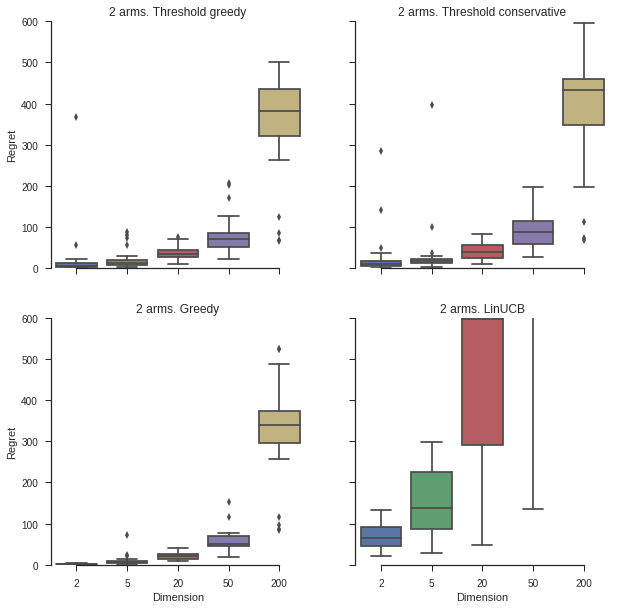

In [53]:
fig, axes = plt.subplots(2,2,figsize=(10,10), sharex = True, sharey = True)
i = 0
axes[0,0].set_title('%d arms. Threshold greedy'%ks[i])
axes[0,1].set_title('%d arms. Threshold conservative'%ks[i])
axes[1,0].set_title('%d arms. Greedy'%ks[i])
axes[1,1].set_title('%d arms. LinUCB'%ks[i])
#Make heatmap of final regret for each method as a function of dimension and number of arms
sns.boxplot(data=pd.DataFrame(data=np.sum(regrets['threshold'][i,:,:,:],2).T, columns=ds), ax = axes[0,0])
sns.boxplot(data=pd.DataFrame(data=np.sum(regrets['thresholdcons'][i,:,:,:],2).T, columns=ds), ax = axes[0,1])
sns.boxplot(data=pd.DataFrame(data=np.sum(regrets['greedy'][i,:,:,:],2).T, columns=ds), ax = axes[1,0])
sns.boxplot(data=pd.DataFrame(data=np.sum(regrets['linucb'][i,:,:,:],2).T, columns=ds), ax = axes[1,1])
axes[0,0].set_ylim([0,600])
axes[0,1].set_ylim([0,600])
axes[1,0].set_ylim([0,600])
axes[1,1].set_ylim([0,600])
axes[0,0].set_ylabel('Regret')
axes[1,0].set_ylabel('Regret')
axes[1,0].set_xlabel('Dimension')
axes[1,1].set_xlabel('Dimension')
sns.despine(trim = True)
#plt.savefig('./figs/compare_methods_traces.pdf')

/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


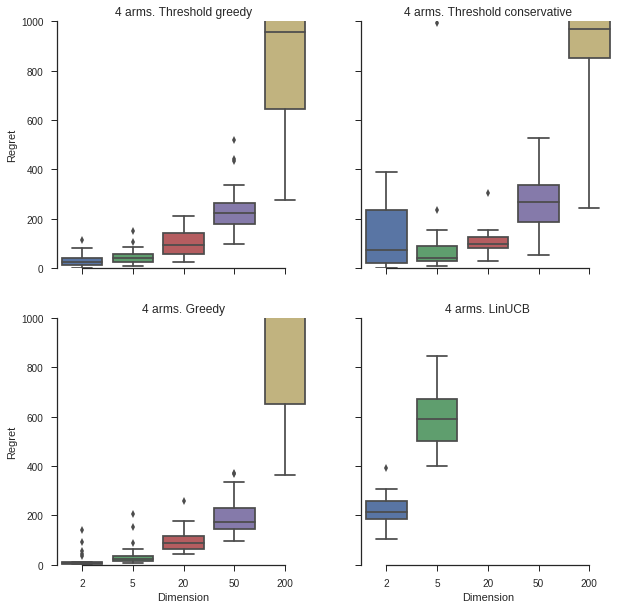

In [54]:

fig, axes = plt.subplots(2,2,figsize=(10,10), sharex = True, sharey = True)
i = 1
ylim = 1000
axes[0,0].set_title('%d arms. Threshold greedy'%ks[i])
axes[0,1].set_title('%d arms. Threshold conservative'%ks[i])
axes[1,0].set_title('%d arms. Greedy'%ks[i])
axes[1,1].set_title('%d arms. LinUCB'%ks[i])
#Make heatmap of final regret for each method as a function of dimension and number of arms
sns.boxplot(data=pd.DataFrame(data=np.sum(regrets['threshold'][i,:,:,:],2).T, columns=ds), ax = axes[0,0])
sns.boxplot(data=pd.DataFrame(data=np.sum(regrets['thresholdcons'][i,:,:,:],2).T, columns=ds), ax = axes[0,1])
sns.boxplot(data=pd.DataFrame(data=np.sum(regrets['greedy'][i,:,:,:],2).T, columns=ds), ax = axes[1,0])
sns.boxplot(data=pd.DataFrame(data=np.sum(regrets['linucb'][i,:,:,:],2).T, columns=ds), ax = axes[1,1])
axes[0,0].set_ylim([0,ylim])
axes[0,1].set_ylim([0,ylim])
axes[1,0].set_ylim([0,ylim])
axes[1,1].set_ylim([0,ylim])
axes[0,0].set_ylabel('Regret')
axes[1,0].set_ylabel('Regret')
axes[1,0].set_xlabel('Dimension')
axes[1,1].set_xlabel('Dimension')
sns.despine(trim = True)


/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


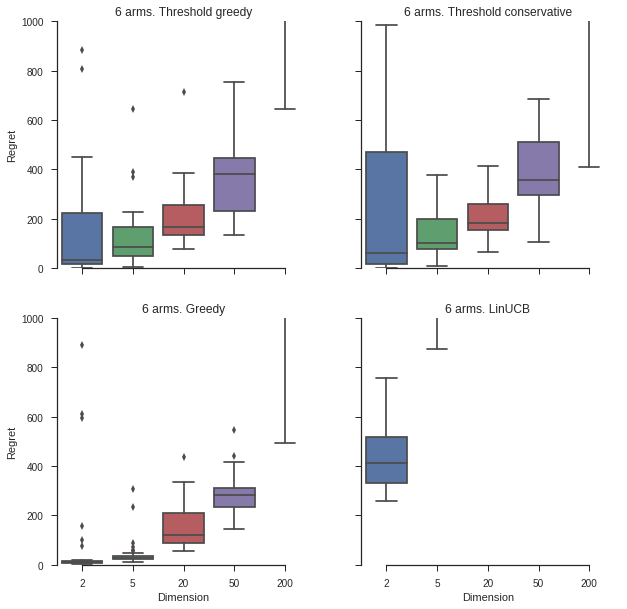

In [55]:
fig, axes = plt.subplots(2,2,figsize=(10,10), sharex = True, sharey = True)
i = 2
ylim = 1000
axes[0,0].set_title('%d arms. Threshold greedy'%ks[i])
axes[0,1].set_title('%d arms. Threshold conservative'%ks[i])
axes[1,0].set_title('%d arms. Greedy'%ks[i])
axes[1,1].set_title('%d arms. LinUCB'%ks[i])
#Make heatmap of final regret for each method as a function of dimension and number of arms
sns.boxplot(data=pd.DataFrame(data=np.sum(regrets['threshold'][i,:,:,:],2).T, columns=ds), ax = axes[0,0])
sns.boxplot(data=pd.DataFrame(data=np.sum(regrets['thresholdcons'][i,:,:,:],2).T, columns=ds), ax = axes[0,1])
sns.boxplot(data=pd.DataFrame(data=np.sum(regrets['greedy'][i,:,:,:],2).T, columns=ds), ax = axes[1,0])
sns.boxplot(data=pd.DataFrame(data=np.sum(regrets['linucb'][i,:,:,:],2).T, columns=ds), ax = axes[1,1])
axes[0,0].set_ylim([0,ylim])
axes[0,1].set_ylim([0,ylim])
axes[1,0].set_ylim([0,ylim])
axes[1,1].set_ylim([0,ylim])
axes[0,0].set_ylabel('Regret')
axes[1,0].set_ylabel('Regret')
axes[1,0].set_xlabel('Dimension')
axes[1,1].set_xlabel('Dimension')
sns.despine(trim = True)

/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


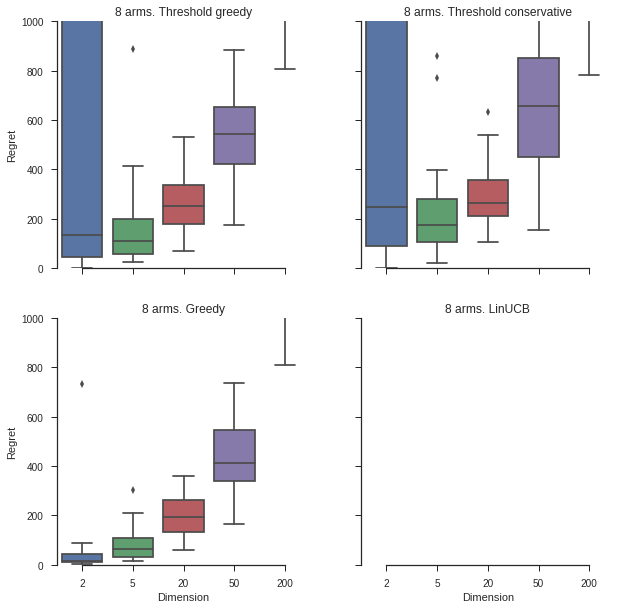

In [58]:
fig, axes = plt.subplots(2,2,figsize=(10,10), sharex = True, sharey = True)
i = 3
ylim = 1000
axes[0,0].set_title('%d arms. Threshold greedy'%ks[i])
axes[0,1].set_title('%d arms. Threshold conservative'%ks[i])
axes[1,0].set_title('%d arms. Greedy'%ks[i])
axes[1,1].set_title('%d arms. LinUCB'%ks[i])
#Make heatmap of final regret for each method as a function of dimension and number of arms
sns.boxplot(data=pd.DataFrame(data=np.sum(regrets['threshold'][i,:,:,:],2).T, columns=ds), ax = axes[0,0])
sns.boxplot(data=pd.DataFrame(data=np.sum(regrets['thresholdcons'][i,:,:,:],2).T, columns=ds), ax = axes[0,1])
sns.boxplot(data=pd.DataFrame(data=np.sum(regrets['greedy'][i,:,:,:],2).T, columns=ds), ax = axes[1,0])
sns.boxplot(data=pd.DataFrame(data=np.sum(regrets['linucb'][i,:,:,:],2).T, columns=ds), ax = axes[1,1])
axes[0,0].set_ylim([0,ylim])
axes[0,1].set_ylim([0,ylim])
axes[1,0].set_ylim([0,ylim])
axes[1,1].set_ylim([0,ylim])
axes[0,0].set_ylabel('Regret')
axes[1,0].set_ylabel('Regret')
axes[1,0].set_xlabel('Dimension')
axes[1,1].set_xlabel('Dimension')
sns.despine(trim = True)


## Number of changes to policy

/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


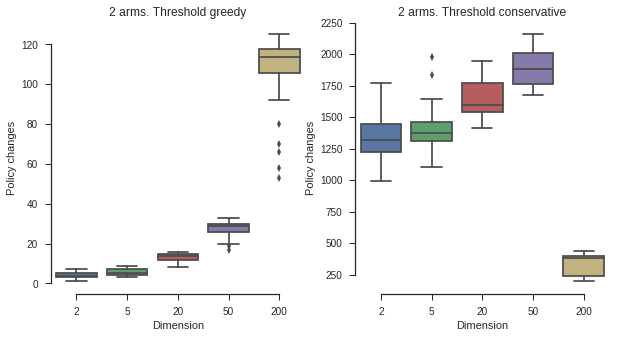

In [65]:
fig, axes = plt.subplots(1,2,figsize=(10,5), sharex = True, sharey = False)
i = 0
axes[0].set_title('%d arms. Threshold greedy'%ks[i])
axes[1].set_title('%d arms. Threshold conservative'%ks[i])
#Make heatmap of final regret for each method as a function of dimension and number of arms
sns.boxplot(data=pd.DataFrame(data=np.sum(update_pols['threshold'][i,:,:,:],2).T, columns=ds), ax = axes[0])
sns.boxplot(data=pd.DataFrame(data=np.sum(update_pols['thresholdcons'][i,:,:,:],2).T, columns=ds), ax = axes[1])
#axes[0].set_ylim([0,600])
#axes[1].set_ylim([0,600])
axes[0].set_ylabel('Policy changes')
axes[1].set_ylabel('Policy changes')
axes[0].set_xlabel('Dimension')
axes[1].set_xlabel('Dimension')
sns.despine(trim = True)
#plt.savefig('./figs/compare_methods_traces.pdf')

/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


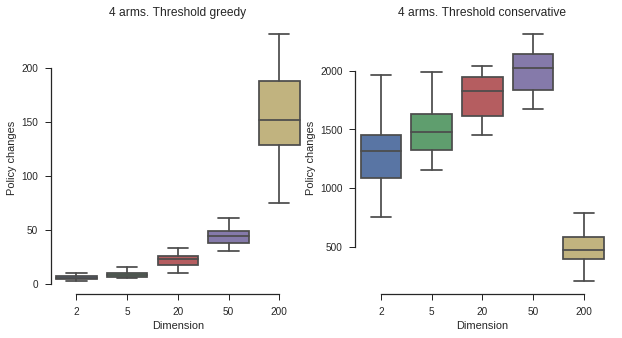

In [66]:
fig, axes = plt.subplots(1,2,figsize=(10,5), sharex = True, sharey = False)
i = 1
axes[0].set_title('%d arms. Threshold greedy'%ks[i])
axes[1].set_title('%d arms. Threshold conservative'%ks[i])
#Make heatmap of final regret for each method as a function of dimension and number of arms
sns.boxplot(data=pd.DataFrame(data=np.sum(update_pols['threshold'][i,:,:,:],2).T, columns=ds), ax = axes[0])
sns.boxplot(data=pd.DataFrame(data=np.sum(update_pols['thresholdcons'][i,:,:,:],2).T, columns=ds), ax = axes[1])
#axes[0].set_ylim([0,600])
#axes[1].set_ylim([0,600])
axes[0].set_ylabel('Policy changes')
axes[1].set_ylabel('Policy changes')
axes[0].set_xlabel('Dimension')
axes[1].set_xlabel('Dimension')
sns.despine(trim = True)



/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


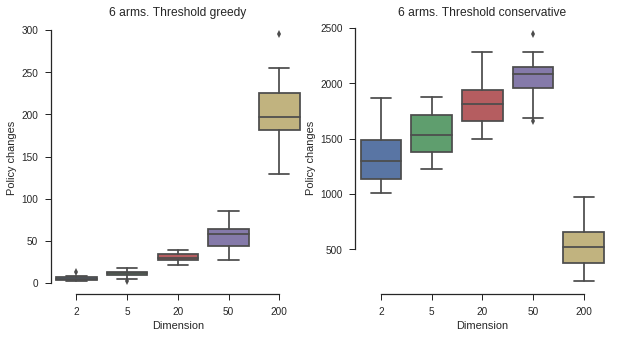

In [67]:
fig, axes = plt.subplots(1,2,figsize=(10,5), sharex = True, sharey = False)
i = 2
axes[0].set_title('%d arms. Threshold greedy'%ks[i])
axes[1].set_title('%d arms. Threshold conservative'%ks[i])
#Make heatmap of final regret for each method as a function of dimension and number of arms
sns.boxplot(data=pd.DataFrame(data=np.sum(update_pols['threshold'][i,:,:,:],2).T, columns=ds), ax = axes[0])
sns.boxplot(data=pd.DataFrame(data=np.sum(update_pols['thresholdcons'][i,:,:,:],2).T, columns=ds), ax = axes[1])
#axes[0].set_ylim([0,600])
#axes[1].set_ylim([0,600])
axes[0].set_ylabel('Policy changes')
axes[1].set_ylabel('Policy changes')
axes[0].set_xlabel('Dimension')
axes[1].set_xlabel('Dimension')
sns.despine(trim = True)


/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


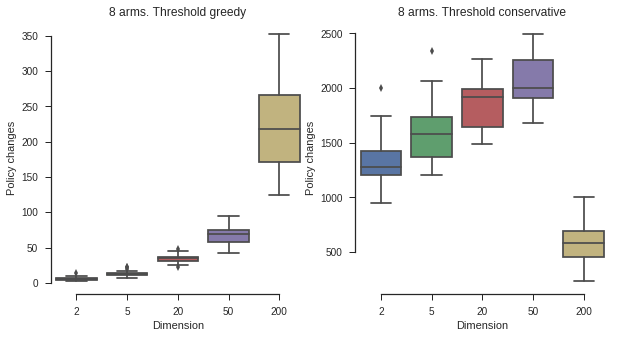

In [68]:
fig, axes = plt.subplots(1,2,figsize=(10,5), sharex = True, sharey = False)
i = 3
axes[0].set_title('%d arms. Threshold greedy'%ks[i])
axes[1].set_title('%d arms. Threshold conservative'%ks[i])
#Make heatmap of final regret for each method as a function of dimension and number of arms
sns.boxplot(data=pd.DataFrame(data=np.sum(update_pols['threshold'][i,:,:,:],2).T, columns=ds), ax = axes[0])
sns.boxplot(data=pd.DataFrame(data=np.sum(update_pols['thresholdcons'][i,:,:,:],2).T, columns=ds), ax = axes[1])
#axes[0].set_ylim([0,600])
#axes[1].set_ylim([0,600])
axes[0].set_ylabel('Policy changes')
axes[1].set_ylabel('Policy changes')
axes[0].set_xlabel('Dimension')
axes[1].set_xlabel('Dimension')
sns.despine(trim = True)

